<a href="https://colab.research.google.com/github/ikwabia/LEGO-SETS/blob/main/Lego_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


In [3]:
from google.colab import files
uploaded = files.upload()

Saving DiB small sample Dec 2015 - Apr 2019 prices.xlsx to DiB small sample Dec 2015 - Apr 2019 prices (1).xlsx


In [5]:

df = pd.read_excel('/content/DiB small sample Dec 2015 - Apr 2019 prices.xlsx')


In [6]:
df

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           223 non-null    int64  
 1   Theme                        223 non-null    object 
 2   #                            223 non-null    object 
 3   # of Pieces                  222 non-null    float64
 4   Year of release              223 non-null    int64  
 5   Name                         223 non-null    object 
 6   Retail price at release ($)  223 non-null    object 
 7   2015-12-01 00:00:00          211 non-null    float64
 8   2016-01-01 00:00:00          213 non-null    float64
 9   2016-02-01 00:00:00          214 non-null    float64
 10  2016-03-01 00:00:00          216 non-null    float64
 11  2016-04-01 00:00:00          218 non-null    float64
 12  2016-05-01 00:00:00          219 non-null    float64
 13  2016-06-01 00:00:00 

In [9]:
df.isna().sum()

id                              0
Theme                           0
#                               0
# of Pieces                     1
Year of release                 0
Name                            0
Retail price at release ($)     0
2015-12-01 00:00:00            12
2016-01-01 00:00:00            10
2016-02-01 00:00:00             9
2016-03-01 00:00:00             7
2016-04-01 00:00:00             5
2016-05-01 00:00:00             4
2016-06-01 00:00:00             3
2016-07-01 00:00:00             2
2016-08-01 00:00:00             1
2016-09-01 00:00:00             1
2016-10-01 00:00:00             1
2016-11-01 00:00:00             0
2016-12-01 00:00:00             4
2017-01-01 00:00:00             4
2017-02-01 00:00:00             3
2017-03-01 00:00:00             3
2017-04-01 00:00:00             3
2017-05-01 00:00:00             3
2017-06-01 00:00:00             3
2017-07-01 00:00:00             3
2017-08-01 00:00:00             3
2017-09-01 00:00:00             3
2017-10-01 00:

In [10]:
df_cleaned = df.dropna()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           223 non-null    int64  
 1   Theme                        223 non-null    object 
 2   #                            223 non-null    object 
 3   # of Pieces                  222 non-null    float64
 4   Year of release              223 non-null    int64  
 5   Name                         223 non-null    object 
 6   Retail price at release ($)  223 non-null    object 
 7   2015-12-01 00:00:00          211 non-null    float64
 8   2016-01-01 00:00:00          213 non-null    float64
 9   2016-02-01 00:00:00          214 non-null    float64
 10  2016-03-01 00:00:00          216 non-null    float64
 11  2016-04-01 00:00:00          218 non-null    float64
 12  2016-05-01 00:00:00          219 non-null    float64
 13  2016-06-01 00:00:00 

In [12]:
df_cleaned

,id,Theme,#,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 222
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           202 non-null    int64  
 1   Theme                        202 non-null    object 
 2   #                            202 non-null    object 
 3   # of Pieces                  202 non-null    float64
 4   Year of release              202 non-null    int64  
 5   Name                         202 non-null    object 
 6   Retail price at release ($)  202 non-null    object 
 7   2015-12-01 00:00:00          202 non-null    float64
 8   2016-01-01 00:00:00          202 non-null    float64
 9   2016-02-01 00:00:00          202 non-null    float64
 10  2016-03-01 00:00:00          202 non-null    float64
 11  2016-04-01 00:00:00          202 non-null    float64
 12  2016-05-01 00:00:00          202 non-null    float64
 13  2016-06-01 00:00:00 

In [14]:
df_cleaned = df.rename(columns={'#': 'Sr #'})


In [15]:
df_cleaned

,id,Theme,Sr #,# of Pieces,Year of release,Name,Retail price at release ($),2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,177.82,185.60,194.30,...,220.27,211.20,241.87,227.73,234.20,279.79,280.00,260.40,257.40,240.60
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,44.93,44.93,50.47,...,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60,86.60
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,165.67,179.53,186.13,...,160.87,162.80,169.87,170.40,165.93,165.47,165.47,165.47,178.67,178.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,36.11,33.32,34.65,...,44.41,44.87,41.00,39.73,40.80,46.94,47.20,48.53,52.07,51.47
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,22.41,21.50,20.39,...,53.13,50.00,38.80,44.40,57.86,60.47,61.20,54.19,70.33,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,381.17,412.60,409.20,...,337.53,321.87,281.40,275.87,254.67,260.73,267.40,246.33,273.67,292.67
219,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,274.67,308.60,320.27,...,248.53,241.53,230.40,222.87,171.60,164.93,199.53,199.87,219.00,219.00
220,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,187.87,199.13,210.73,...,192.67,189.13,161.33,163.00,148.93,172.93,197.80,217.13,217.40,207.40
221,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,163.94,176.88,169.53,...,209.73,203.27,190.60,187.47,186.80,205.13,205.13,213.53,208.53,196.87


In [16]:
theme_data = df_cleaned.groupby('Theme')['# of Pieces'].sum()

In [17]:
theme_data

Theme
Advanced Models      91387.0
Architecture         15644.0
Discovery             2909.0
Harry Potter         17612.0
Hobbit                2973.0
Hobby                 3575.0
Star Wars            77034.0
The Lord of Rings     5957.0
Name: # of Pieces, dtype: float64

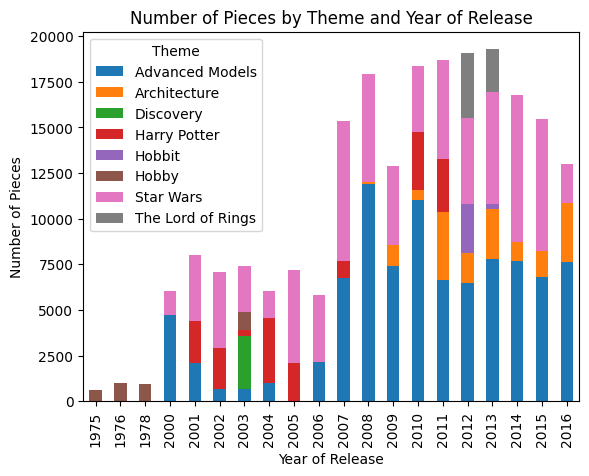

In [18]:
# Group the data by theme and year of release and sum the number of pieces
theme_data = df.groupby(['Theme', 'Year of release'])['# of Pieces'].sum()

# Reshape the data into a pivot table
theme_data = theme_data.unstack(level=0)

# Create a stacked bar chart
theme_data.plot(kind='bar', stacked=True)
plt.xlabel('Year of Release')
plt.ylabel('Number of Pieces')
plt.title('Number of Pieces by Theme and Year of Release')
plt.show()

In [20]:
#Top 10 Expensive Sets
# Sort the data by secondary market prices in descending order

df_sorted = df_cleaned.sort_values(by='Retail price at release ($)', ascending=False)

# Get the names of the top 10 most expensive sets
top_names = df_sorted.head(10)['Name']

# Combine the names of the top 10 most expensive sets into a single string
text = ' '.join(top_names)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: ignored

In [21]:
#Top 10 Cheapest Sets

df = df_cleaned.sort_values(by=['Retail price at release ($)'])
df = df.head(10)

# Generate the word cloud
text = ' '.join(df['Name'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

TypeError: ignored

In [ ]:
import plotly.graph_objects as go
df_year = pd.DataFrame(df_cleaned.groupby('Year of release')['Name'].agg(['count', lambda x: ', '.join(x)])).reset_index()
df_year.columns = ['Year of release', 'count', 'Name']

# Define the color scale
color_scale = 'RdYlGn_r'

fig = go.Figure([go.Bar(x=df_year['Year of release'], y=df_year['count'], hovertext=df_year['Name'], hoverinfo='text', marker=dict(color=df_year['count'], coloraxis="coloraxis"))])
fig.update_layout(title='Number of Sets Released per Year', xaxis_title='Year', yaxis_title='Number of Sets', coloraxis=dict(colorscale=color_scale))
fig.show()

In [ ]:
df_cleaned.columns

Index(['id', 'Theme', 'Sr #', '# of Pieces', 'Year of release', 'Name',
       'Retail price at release ($)', '12/1/2015', '1/1/2016', '2/1/2016',
       '3/1/2016', '4/1/2016', '5/1/2016', '6/1/2016', '7/1/2016', '8/1/2016',
       '9/1/2016', '10/1/2016', '11/1/2016', '12/1/2016', '1/1/2017',
       '2/1/2017', '3/1/2017', '4/1/2017', '5/1/2017', '6/1/2017', '7/1/2017',
       '8/1/2017', '9/1/2017', '10/1/2017', '11/1/2017', '12/2/2017',
       '1/1/2018', '2/1/2018', '3/1/2018', '4/1/2018', '5/1/2018', '6/1/2018',
       '7/1/2018', '8/1/2018', '9/1/2018', '10/1/2018', '11/1/2018',
       '12/1/2018', '1/1/2019', '2/1/2019', '3/1/2019', '4/1/2019'],
      dtype='object')

In [ ]:
transpose = pd.melt(df_cleaned,id_vars = ['id', 'Theme', 'Sr #', '# of Pieces', 'Year of release', 'Name',
       'Retail price at release ($)'])

In [ ]:
transpose.columns = ['id', 'Theme', 'Sr #', '# of Pieces', 'Year of release', 'Name',
       'Retail price at release ($)', 'dates', 'price']

In [ ]:
transpose

,id,Theme,Sr #,# of Pieces,Year of release,Name,Retail price at release ($),dates,price
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,12/1/2015,177.82
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,12/1/2015,44.93
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,12/1/2015,165.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,12/1/2015,36.11
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,12/1/2015,22.41
...,...,...,...,...,...,...,...,...,...
9138,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,4/1/2019,292.67
9139,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,4/1/2019,219.00
9140,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,4/1/2019,207.40
9141,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,4/1/2019,196.87


In [ ]:
transpose['dates'] = pd.to_datetime(transpose['dates'])

In [ ]:
transpose

,id,Theme,Sr #,# of Pieces,Year of release,Name,Retail price at release ($),dates,price
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,2015-12-01,177.82
1,2,Architecture,21000-1,69.0,2008,Sears Tower,19.99,2015-12-01,44.93
2,3,Architecture,21001-1,69.0,2008,John Hancock Center,19.99,2015-12-01,165.67
3,4,Architecture,21002-1,77.0,2009,Empire State Building,19.99,2015-12-01,36.11
4,5,Architecture,21003-1,57.0,2009,Seattle Space Needle,19.99,2015-12-01,22.41
...,...,...,...,...,...,...,...,...,...
9138,219,Star Wars,10174-1,1068.0,2006,Imperial AT-ST,79.99,2019-04-01,292.67
9139,220,Star Wars,4483-1,1068.0,2003,AT-AT,99.99,2019-04-01,219.00
9140,221,Star Wars,7676-1,1034.0,2008,Republic Attack Gunship,119.99,2019-04-01,207.40
9141,222,Star Wars,7964-1,1015.0,2011,Republic Frigate,119.99,2019-04-01,196.87


In [ ]:
transpose.price.min(), transpose.price.max()

(0.0, 4980.0)

In [ ]:
tmp = transpose[transpose['Name'] == 'Fallingwater']

In [ ]:
tmp.head(2)

,id,Theme,Sr #,# of Pieces,Year of release,Name,Retail price at release ($),dates,price
0,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,2015-12-01,177.82
223,1,Architecture,21005-1,811.0,2009,Fallingwater,99.99,2016-01-01,185.60


In [ ]:
import plotly.express as px

## timeseries of prices per Theme

In [ ]:
transpose.Theme.unique()

array(['Architecture', 'Harry Potter', 'Discovery', 'Hobby',
       'Advanced Models', 'The Lord of Rings', 'Hobbit', 'Star Wars'],
      dtype=object)

In [ ]:
theme = "Star Wars"
px.line(transpose[transpose.Theme==theme], x='dates', y='price', color='Name',
        title=f"Prices of the legos sets of the theme {theme}")

In [ ]:
theme = "Harry Potter"
px.line(transpose[transpose.Theme==theme], x='dates', y='price', color='Name',
        title=f"Prices of the legos sets of the theme {theme}")